In [13]:
from databaseCommunication import readDatabaseFile, createDataFrame_list
from dataframeFormating import createLabeledDataFrame_list #, N_polarized_pure3b, N_polarized, N_linear, getReducedDataframe, getReducedResults, 
from calculation import trapFrequency, getSubDF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [23]:
label_heads = []

"""labels = [[[], [148191, 148328]],
          [[], [148191, 148306]]
             ]""" # This is May 17th

"""labels = [[[], [148615, 148782]]
             ] # This is May 18th"""
"""labels = [[[], [148894, 149062]]
             ] # This is May 18th"""
labels = [[[], [150721, 150756]],
             ] # This is May 18th
#[['lossy'], [150269, 150437]]
#[['notLossy'], [150438, ]]

# 1st run : -85GHz, 7.4 field
# 2nd run : -20GHz, 7.4 field
# 3rd run : -20GHz, 7.72 field
# 4th run : -85GHz, 7.72 field
# 5th run : -5GHz, 7.4 field
# 6th run : -5GHz, 7.72 field
# 7th run : -1GHz, 7.72 field
# 8th run : -1GHz, 7.4 field

excluded = [150741, 150742]
#excluded = list(df_TOF[df_TOF["yWidth"] > 50]["imageID"]) + list(df_TOF[df_TOF["xWidth"] > 50]["imageID"])

In [24]:
"""ciceroVariables = ['TOF']
fitVariables = ['nCount', 'xWidth', 'yWidth', 'xPos', 'yPos']

df = createLabeledDataFrame_list(labels, label_heads, ciceroVariables, fitVariables)
for column in df.columns:
    try:
        df[column] = df[column].astype(float)
    except:
        pass
df.to_pickle('data_save_magnification_calibration.pickle')"""

"ciceroVariables = ['TOF']\nfitVariables = ['nCount', 'xWidth', 'yWidth', 'xPos', 'yPos']\n\ndf = createLabeledDataFrame_list(labels, label_heads, ciceroVariables, fitVariables)\nfor column in df.columns:\n    try:\n        df[column] = df[column].astype(float)\n    except:\n        pass\ndf.to_pickle('data_save_magnification_calibration.pickle')"

In [53]:
df = pd.read_pickle('data_save_magnification_calibration.pickle')
# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df['imageID'].isin(excluded))[0])
df.drop(indexNames, inplace = True)

df['xPos'] *= 6.5*10**(-6) # in meters
df['yPos'] *= 6.5*10**(-6) # in meters
df['TOF'] *= 10**(-3) # in seconds
df_mean = df.groupby(['TOF']).mean()

x0 = df_mean['xPos'][0]
y0 = df_mean['yPos'][0]

df['rPos'] = np.sqrt((df['xPos']-x0)**2+(df['yPos']-y0)**2)


#Normalization
#df['nCount'] = df['nCount']*(6.5/3.45/4)**2   # real number
#df['xWidth'] = df['xWidth']*(6.5/4)   # in micro meter
#df['yWidth'] = df['yWidth']*(6.5/4)   # in micro meter

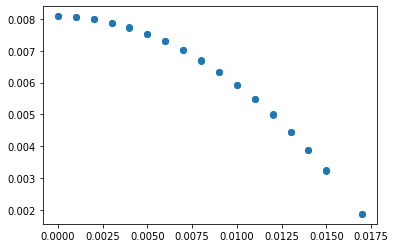

In [54]:
plt.figure()
plt.plot(df['TOF'], df['xPos'], 'o')
plt.show()

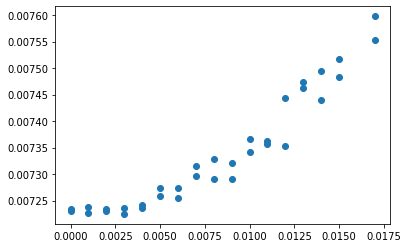

In [55]:
plt.figure()
plt.plot(df['TOF'], df['yPos'], 'o')
plt.show()

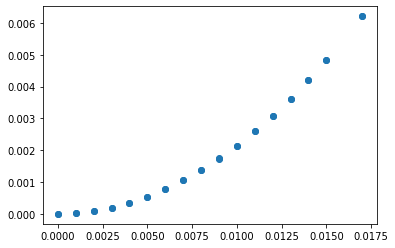

In [56]:
plt.figure()
plt.plot(df['TOF'], df['rPos'], 'o')
plt.show()

In [59]:
g = 9.81

def position(t, mag):
    return mag*(1/2*g*(t**2))


popt, pcov = curve_fit(position, df['TOF'], df['rPos'])
print('Magnification coefficient is ' + str(round(popt[0], 2)))

Magnification coefficient is 4.38
